In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as st

/home/jn/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [15]:
df_cluster = pd.read_csv('../ASIA_CCS_Data/All_5_Clustering_Algo_Result_10-04-2024.csv')
df_cluster.head()

,Landing_Page_Size_In_KB,Same Landing Domain,Has Bank Related Keywords,Has Crypto Related Keywords,Has Card Related Keywords,Unique_Internal_Page_Link_Cnt,Unique_External_Page_Link_Cnt,Avg_External_Links_Len,Stdv_External_Links_Len,Ratio_Shortened_URL_And_External_Links,...,Number Instead of Word,Is WhoIs Registrar Available,Is SSL Certificate Retrievable,K-means Label,KMedoids Label,Hierarchical Label,DBSCAN Label,GMM Label,IPQS_Flag,Domain
0,86.53,1,0,0,0,7,5,50.80,10.26,0.0,...,0,1,0,0,0,2,0,0,0,1001minutesforukraine.com
1,123.73,1,0,0,0,15,2,75.50,32.50,0.0,...,0,1,0,0,0,2,0,0,0,1to1ukrainemuseums.org
2,96.91,1,0,0,0,2,3,43.00,5.10,0.0,...,0,0,1,0,0,2,0,0,0,1violettepourlukraine.fr
3,1170.81,1,0,0,0,1,14,45.43,24.74,0.0,...,0,1,0,0,0,2,0,0,0,33lettersforukraine.com
4,47.44,1,0,0,0,25,19,29.11,17.09,0.0,...,0,0,0,0,2,3,0,2,1,4myukraine.com


In [60]:
df_feature = pd.read_csv('../ASIA_CCS_Data/final_feature_data.csv')
df_feature.head()

,FQDN,Searched_URL,Status Code,External_unique_URL_List,Landing_Page_Size_In_KB,Same Landing Domain,Has Bank Related Keywords,Has Crypto Related Keywords,Has Card Related Keywords,Unique_Internal_Page_Link_Cnt,...,Help Keyword Check,Campaign Keyword Check,War Keyword Check,For and To Keyword Check,Number Instead of Word,Is Name Server Available,Is Self Resolving Name Server,Total_Name_Servers,Is WhoIs Registrar Available,Is SSL Certificate Retrievable
0,1001minutesforukraine.com,https://www.1001minutesforukraine.com,200,['https://www.facebook.com/1001-Minutes-for-Uk...,86.53,1,0,0,0,7,...,0,0,0,1,0,1,0,2,1,0
1,1to1ukrainemuseums.org,https://www.1to1ukrainemuseums.org,200,['https://padlet.com/linda22/uk9hqc1ftu82xcwy'...,123.73,1,0,0,0,15,...,0,0,0,1,0,1,0,12,1,0
2,1violettepourlukraine.fr,https://www.1violettepourlukraine.fr,200,['https://www.facebook.com/UneViolettePourlUkr...,96.91,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
3,33lettersforukraine.com,https://www.33lettersforukraine.com,-1,"['https://www.instagram.com/36daysoftype', 'ht...",1170.81,1,0,0,0,1,...,0,0,0,1,0,1,0,6,1,0
4,4myukraine.com,https://www.4myukraine.com,200,"['https://www.facebook.com/4myukraine', 'https...",47.44,1,0,0,0,25,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df_feature['Status Code'].value_counts()

Status Code
 200    1598
-1       520
Name: count, dtype: int64

In [98]:
df_feature['K-means Label'] = df_cluster['K-means Label']
df_feature['KMedoids Label'] = df_cluster['KMedoids Label']
df_feature['Hierarchical Label'] = df_cluster['Hierarchical Label']
df_feature['DBSCAN Label'] = df_cluster['DBSCAN Label']
df_feature['GMM Label'] = df_cluster['GMM Label']

df_feature.head()

,FQDN,Searched_URL,Status Code,External_unique_URL_List,Landing_Page_Size_In_KB,Same Landing Domain,Has Bank Related Keywords,Has Crypto Related Keywords,Has Card Related Keywords,Unique_Internal_Page_Link_Cnt,...,Is Name Server Available,Is Self Resolving Name Server,Total_Name_Servers,Is WhoIs Registrar Available,Is SSL Certificate Retrievable,K-means Label,KMedoids Label,Hierarchical Label,DBSCAN Label,GMM Label
0,1001minutesforukraine.com,https://www.1001minutesforukraine.com,200,['https://www.facebook.com/1001-Minutes-for-Uk...,86.53,1,0,0,0,7,...,1,0,2,1,0,0,0,2,0,0
1,1to1ukrainemuseums.org,https://www.1to1ukrainemuseums.org,200,['https://padlet.com/linda22/uk9hqc1ftu82xcwy'...,123.73,1,0,0,0,15,...,1,0,12,1,0,0,0,2,0,0
2,1violettepourlukraine.fr,https://www.1violettepourlukraine.fr,200,['https://www.facebook.com/UneViolettePourlUkr...,96.91,1,0,0,0,2,...,0,0,0,0,1,0,0,2,0,0
3,33lettersforukraine.com,https://www.33lettersforukraine.com,-1,"['https://www.instagram.com/36daysoftype', 'ht...",1170.81,1,0,0,0,1,...,1,0,6,1,0,0,0,2,0,0
4,4myukraine.com,https://www.4myukraine.com,200,"['https://www.facebook.com/4myukraine', 'https...",47.44,1,0,0,0,25,...,0,0,0,0,0,0,2,3,0,2


In [107]:
live_url_IPQS_analysis = pd.read_csv("../Data/all_active_URLS_IPQS_analysis.csv")
live_url_IPQS_analysis

,url,unsafe,status_code,parking,spamming,malware,phishing,suspicious,adult,risk_score
0,napavalleytoukraine.org,False,301,False,False,False,False,False,False,0
1,cannabiswithukraine.org,False,200,False,False,False,False,True,False,90
2,givetoukrainetoday.com,False,200,False,False,False,False,True,False,55
3,beforukraine.com,False,200,True,False,False,False,True,False,90
4,ukrainianaid.co.uk,False,200,True,False,False,False,True,False,99
...,...,...,...,...,...,...,...,...,...,...
2875,save-ukraine.life,False,200,False,False,False,False,False,False,40
2876,ukraineaid.online,False,200,False,False,False,False,False,False,72
2877,haarlem4ukraine.nl,False,200,False,False,False,False,False,False,0
2878,ukraine-willkommen.de,False,200,False,False,False,False,False,False,0


In [109]:
data_ = pd.read_csv('../ASIA_CCS_Data/All_5_Clustering_Algo_Result_10-04-2024.csv')
data_.head()

,Landing_Page_Size_In_KB,Same Landing Domain,Has Bank Related Keywords,Has Crypto Related Keywords,Has Card Related Keywords,Unique_Internal_Page_Link_Cnt,Unique_External_Page_Link_Cnt,Avg_External_Links_Len,Stdv_External_Links_Len,Ratio_Shortened_URL_And_External_Links,...,Number Instead of Word,Is WhoIs Registrar Available,Is SSL Certificate Retrievable,K-means Label,KMedoids Label,Hierarchical Label,DBSCAN Label,GMM Label,IPQS_Flag,Domain
0,86.53,1,0,0,0,7,5,50.80,10.26,0.0,...,0,1,0,0,0,2,0,0,0,1001minutesforukraine.com
1,123.73,1,0,0,0,15,2,75.50,32.50,0.0,...,0,1,0,0,0,2,0,0,0,1to1ukrainemuseums.org
2,96.91,1,0,0,0,2,3,43.00,5.10,0.0,...,0,0,1,0,0,2,0,0,0,1violettepourlukraine.fr
3,1170.81,1,0,0,0,1,14,45.43,24.74,0.0,...,0,1,0,0,0,2,0,0,0,33lettersforukraine.com
4,47.44,1,0,0,0,25,19,29.11,17.09,0.0,...,0,0,0,0,2,3,0,2,1,4myukraine.com


In [110]:
df_feature['IPQS_Flag'] = data_['IPQS_Flag']

In [111]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2118 entries, 0 to 2117
Data columns (total 47 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   FQDN                                         2118 non-null   object 
 1   Searched_URL                                 2118 non-null   object 
 2   Status Code                                  2118 non-null   int64  
 3   External_unique_URL_List                     2118 non-null   object 
 4   Landing_Page_Size_In_KB                      2118 non-null   float64
 5   Same Landing Domain                          2118 non-null   int64  
 6   Has Bank Related Keywords                    2118 non-null   int64  
 7   Has Crypto Related Keywords                  2118 non-null   int64  
 8   Has Card Related Keywords                    2118 non-null   int64  
 9   Unique_Internal_Page_Link_Cnt                2118 non-null   int64  
 10  

In [112]:
df_feature.to_csv('../ASIA_CCS_Data/final_full_website_data_with_features_and_cluster.csv', index=None)

In [11]:
df = pd.read_csv('../Data/Live_Websites_Page_Count_5.csv')
df.head()

,URL,Page Size In Byte,Status Code,Same Domain Unique Page Count,Other Website Unique Link Count,Other Website Uniques Links,Cluster Label
0,https://www.1001minutesforukraine.com,85077,200,7,5,['https://www.facebook.com/1001-Minutes-for-Uk...,0
1,https://www.1to1ukrainemuseums.org,124701,200,15,2,['https://padlet.com/linda22/uk9hqc1ftu82xcwy'...,0
2,https://www.1violettepourlukraine.fr,96554,200,2,3,['https://www.facebook.com/UneViolettePourlUkr...,2
3,https://www.33lettersforukraine.com,1170806,200,1,14,"['https://www.instagram.com/36daysoftype', 'ht...",0
4,https://www.411ukraine.com,0,-1,0,0,NaN,2


In [62]:
len(set(df_feature['Searched_URL']).intersection(set(df['URL'])))

2118

In [12]:
df['Status Code'].to_list().count(200)

2118

In [30]:
df = df[df['Status Code']==200]
df.index = range(0,len(df))
len(df)

2118

In [65]:
for i in range(len(df)):
    if df['URL'][i]!=df_feature['Searched_URL'][i]:
        print('Alert')


In [66]:
df['Cluster Label'] = df_cluster['K-means Label']

In [67]:
df

,URL,Page Size In Byte,Status Code,Same Domain Unique Page Count,Other Website Unique Link Count,Other Website Uniques Links,Cluster Label
0,https://www.1001minutesforukraine.com,85077,200,7,5,['https://www.facebook.com/1001-Minutes-for-Uk...,0
1,https://www.1to1ukrainemuseums.org,124701,200,15,2,['https://padlet.com/linda22/uk9hqc1ftu82xcwy'...,0
2,https://www.1violettepourlukraine.fr,96554,200,2,3,['https://www.facebook.com/UneViolettePourlUkr...,0
3,https://www.33lettersforukraine.com,1170806,200,1,14,"['https://www.instagram.com/36daysoftype', 'ht...",0
4,https://www.4myukraine.com,47441,200,25,19,"['https://www.facebook.com/4myukraine', 'https...",0
...,...,...,...,...,...,...,...
2113,https://www.yssukraine.com,76147,200,22,4,['https://youtube.com/channel/UCZ0OloflVnraDFb...,0
2114,https://www.zbroimyukraine.pl,363046,200,10,13,['https://www.youtube.com/channel/UCwE0BTL9pFW...,0
2115,https://www.zuerichhilftderukraine.ch,479368,200,10,4,['https://www.instagram.com/zuerich_hilft_der_...,0
2116,https://www.zugang-b-ukraine.org,304139,200,1,0,[],0


In [68]:
live_set = {}
for i in range(len(df)):
    if df['Status Code'][i]==200:
        live_set[df['URL'][i]] = [df['Same Domain Unique Page Count'][i],df['Cluster Label'][i]]

live_set

{'https://www.1001minutesforukraine.com': [7, 0],
 'https://www.1to1ukrainemuseums.org': [15, 0],
 'https://www.1violettepourlukraine.fr': [2, 0],
 'https://www.33lettersforukraine.com': [1, 0],
 'https://www.4myukraine.com': [25, 0],
 'https://www.4ukraine.ca': [27, 0],
 'https://www.4ukraine.co': [2, 2],
 'https://www.4ukraine.cz': [1, 2],
 'https://www.4ukraine.eu': [1, 2],
 'https://www.4ukraine.net': [14, 0],
 'https://www.4ukraine.org.uk': [16, 0],
 'https://www.4ukraine.pl': [1, 0],
 'https://www.4ukrainians.com': [7, 0],
 'https://www.518ukrainians.com': [7, 0],
 'https://www.a4-ukraine.com': [7, 0],
 'https://www.aboutukraine.org': [1, 1],
 'https://www.about-ukraine.org': [1, 0],
 'https://www.absolutejobsforukraine.be': [3, 2],
 'https://www.act-for-ukraine.co': [1, 2],
 'https://www.actinukrainenow.com': [2, 0],
 'https://www.actinukrainenow.org': [20, 0],
 'https://www.action4ukraine.org': [2, 2],
 'https://www.actions-fondations-ukraine.org': [1, 1],
 'https://www.action-

In [69]:
len(live_set)

2118

In [70]:
cluster_1 = df.loc[df['Cluster Label']==0]
cluster_2 = df.loc[df['Cluster Label']==1]
cluster_3 = df.loc[df['Cluster Label']==2]

In [71]:
def cluster_wise_status_code(entry,name):
    codes = np.unique(df['Status Code'])
    cnt = {'Cluster': name}
    for i in codes:
        cnt[i] = entry.to_list().count(i)
    
    return pd.DataFrame([cnt])

In [72]:
status_codes_for_individual_cluster = cluster_wise_status_code(cluster_1['Status Code'],'cluster_1')
status_codes_for_individual_cluster = pd.concat([status_codes_for_individual_cluster,cluster_wise_status_code(cluster_2['Status Code'],'cluster_2')], axis=0,ignore_index=True)
status_codes_for_individual_cluster = pd.concat([status_codes_for_individual_cluster,cluster_wise_status_code(cluster_3['Status Code'],'cluster_3')], axis=0,ignore_index=True)
status_codes_for_individual_cluster

,Cluster,200
0,cluster_1,1185
1,cluster_2,379
2,cluster_3,554


In [73]:
def Page_Analysis(entry,name):
  stats = {
    'Cluster': name,
    'Mean': np.round((st.mean(entry)),2),
    'Median': np.round((st.median(entry)),2),
    'Mode': np.round((st.mode(entry)),2),
    'STD': np.round((st.stdev(entry)),2),
    'MAX':np.round((max(entry)),2),
    'MIN':np.round((min(entry)),2)
  }
  stats['Highest Fequency'] = entry.to_list().count(stats['Mode'])
  return pd.DataFrame([stats])

In [74]:
page_sizes = Page_Analysis(cluster_1['Page Size In Byte'],'cluster_1')
page_sizes = pd.concat([page_sizes,Page_Analysis(cluster_2['Page Size In Byte'],'cluster_2')], axis=0,ignore_index=True)
page_sizes = pd.concat([page_sizes,Page_Analysis(cluster_3['Page Size In Byte'],'cluster_3')], axis=0,ignore_index=True)
page_sizes

,Cluster,Mean,Median,Mode,STD,MAX,MIN,Highest Fequency
0,cluster_1,256211.47,141416.0,175472,303358.18,2808144,114,5
1,cluster_2,2122.96,949.0,114,5594.41,56385,0,115
2,cluster_3,41925.27,33490.0,17297,65626.74,1257089,244,6


In [75]:
page_cnt = Page_Analysis(cluster_1['Same Domain Unique Page Count'],'cluster_1')
page_cnt = pd.concat([page_cnt,Page_Analysis(cluster_2['Same Domain Unique Page Count'],'cluster_2')], axis=0,ignore_index=True)
page_cnt = pd.concat([page_cnt,Page_Analysis(cluster_3['Same Domain Unique Page Count'],'cluster_3')], axis=0,ignore_index=True)
page_cnt

,Cluster,Mean,Median,Mode,STD,MAX,MIN,Highest Fequency
0,cluster_1,15.77,8.0,1,29.61,469,1,162
1,cluster_2,1.47,1.0,1,2.61,31,1,350
2,cluster_3,11.48,4.0,1,39.02,501,1,166


In [76]:
other_link_cnt = Page_Analysis(cluster_1['Other Website Unique Link Count'],'cluster_1')
other_link_cnt = pd.concat([other_link_cnt,Page_Analysis(cluster_2['Other Website Unique Link Count'],'cluster_2')], axis=0,ignore_index=True)
other_link_cnt = pd.concat([other_link_cnt,Page_Analysis(cluster_3['Other Website Unique Link Count'],'cluster_3')], axis=0,ignore_index=True)
other_link_cnt

,Cluster,Mean,Median,Mode,STD,MAX,MIN,Highest Fequency
0,cluster_1,4.85,3.0,0,8.79,139,0,194
1,cluster_2,0.01,0.0,0,0.10,1,0,375
2,cluster_3,4.38,2.0,1,5.94,68,1,189


In [77]:
def page_cnt_wthin_ranges(entry,name):

    ranges = {'Cluster':name,'0 page':0,'1 page':0,'2-3 pages':0, '4-5 pages':0,'6-10 pages':0,'> 10 pages':0}
    for i in entry:
        if i==0:
            ranges['0 page'] += 1
        elif i==1:
            ranges['1 page'] += 1
        elif i<4:
            ranges['2-3 pages'] += 1
        elif i<6:
            ranges['4-5 pages'] += 1
        elif i<11:
            ranges['6-10 pages'] += 1
        else:
            ranges['> 10 pages'] += 1
    
    return pd.DataFrame([ranges])

In [78]:
page_cnt_ranges = page_cnt_wthin_ranges(cluster_1['Same Domain Unique Page Count'],'cluster_1')
page_cnt_ranges = pd.concat([page_cnt_ranges,page_cnt_wthin_ranges(cluster_2['Same Domain Unique Page Count'],'cluster_2')], axis=0,ignore_index=True)
page_cnt_ranges = pd.concat([page_cnt_ranges,page_cnt_wthin_ranges(cluster_3['Same Domain Unique Page Count'],'cluster_3')], axis=0,ignore_index=True)
page_cnt_ranges

,Cluster,0 page,1 page,2-3 pages,4-5 pages,6-10 pages,> 10 pages
0,cluster_1,0,162,164,106,275,478
1,cluster_2,0,350,13,4,5,7
2,cluster_3,0,166,107,58,88,135


In [79]:
other_link_cnt_ranges = page_cnt_wthin_ranges(cluster_1['Other Website Unique Link Count'],'cluster_1')
other_link_cnt_ranges = pd.concat([other_link_cnt_ranges,page_cnt_wthin_ranges(cluster_2['Other Website Unique Link Count'],'cluster_2')], axis=0,ignore_index=True)
other_link_cnt_ranges = pd.concat([other_link_cnt_ranges,page_cnt_wthin_ranges(cluster_3['Other Website Unique Link Count'],'cluster_3')], axis=0,ignore_index=True)
other_link_cnt_ranges

,Cluster,0 page,1 page,2-3 pages,4-5 pages,6-10 pages,> 10 pages
0,cluster_1,194,170,316,216,182,107
1,cluster_2,375,4,0,0,0,0
2,cluster_3,0,189,159,75,88,43


In [80]:
print('websites with single page but contains more than 10 unique links of other websites')
print("cluster 1 count:",len(cluster_1.loc[(cluster_1['Same Domain Unique Page Count']==1) & (cluster_1['Other Website Unique Link Count']>=10)]))
print("cluster 2 count:",len(cluster_2.loc[(cluster_2['Same Domain Unique Page Count']==1) & (cluster_2['Other Website Unique Link Count']>=10)]))
print("cluster 3 count:",len(cluster_3.loc[(cluster_3['Same Domain Unique Page Count']==1) & (cluster_3['Other Website Unique Link Count']>=10)]))


websites with single page but contains more than 10 unique links of other websites
cluster 1 count: 21
cluster 2 count: 0
cluster 3 count: 8


In [81]:
print('websites with 2-3 pages but contains more than 10 unique links of other websites')
print("cluster 1 count:",len(cluster_1.loc[(cluster_1['Same Domain Unique Page Count']>1) & (cluster_1['Same Domain Unique Page Count']<4) & (cluster_1['Other Website Unique Link Count']>=10)]))
print("cluster 2 count:",len(cluster_2.loc[(cluster_2['Same Domain Unique Page Count']>1) & (cluster_2['Same Domain Unique Page Count']<4) & (cluster_2['Other Website Unique Link Count']>=10)]))
print("cluster 3 count:",len(cluster_3.loc[(cluster_3['Same Domain Unique Page Count']>1) & (cluster_3['Same Domain Unique Page Count']<4) & (cluster_3['Other Website Unique Link Count']>=10)]))


websites with 2-3 pages but contains more than 10 unique links of other websites
cluster 1 count: 13
cluster 2 count: 0
cluster 3 count: 11


In [82]:
print('websites with single page but contains 6-10 unique links of other websites')
print("cluster 1 count:",len(cluster_1.loc[(cluster_1['Same Domain Unique Page Count']==1) & (cluster_1['Other Website Unique Link Count']>=6) & (cluster_1['Other Website Unique Link Count']<11)]))
print("cluster 2 count:",len(cluster_2.loc[(cluster_2['Same Domain Unique Page Count']==1) & (cluster_2['Other Website Unique Link Count']>=6) & (cluster_2['Other Website Unique Link Count']<11)]))
print("cluster 3 count:",len(cluster_3.loc[(cluster_3['Same Domain Unique Page Count']==1) & (cluster_3['Other Website Unique Link Count']>=6) & (cluster_3['Other Website Unique Link Count']<11)]))



websites with single page but contains 6-10 unique links of other websites
cluster 1 count: 11
cluster 2 count: 0
cluster 3 count: 24


In [83]:
print('websites with single page but contains 4-5 unique links of other websites')
print("cluster 1 count:",len(cluster_1.loc[(cluster_1['Same Domain Unique Page Count']==1) & (cluster_1['Other Website Unique Link Count']>=4) & (cluster_1['Other Website Unique Link Count']<6)]))
print("cluster 2 count:",len(cluster_2.loc[(cluster_2['Same Domain Unique Page Count']==1) & (cluster_2['Other Website Unique Link Count']>=4) & (cluster_2['Other Website Unique Link Count']<6)]))
print("cluster 3 count:",len(cluster_3.loc[(cluster_3['Same Domain Unique Page Count']==1) & (cluster_3['Other Website Unique Link Count']>=4) & (cluster_3['Other Website Unique Link Count']<6)]))



websites with single page but contains 4-5 unique links of other websites
cluster 1 count: 21
cluster 2 count: 0
cluster 3 count: 18


In [84]:
print('websites with single page but contains 2-3 unique links of other websites')
print("cluster 1 count:",len(cluster_1.loc[(cluster_1['Same Domain Unique Page Count']==1) & (cluster_1['Other Website Unique Link Count']>=2) & (cluster_1['Other Website Unique Link Count']<4)]))
print("cluster 2 count:",len(cluster_2.loc[(cluster_2['Same Domain Unique Page Count']==1) & (cluster_2['Other Website Unique Link Count']>=2) & (cluster_2['Other Website Unique Link Count']<4)]))
print("cluster 3 count:",len(cluster_3.loc[(cluster_3['Same Domain Unique Page Count']==1) & (cluster_3['Other Website Unique Link Count']>=2) & (cluster_3['Other Website Unique Link Count']<4)]))



websites with single page but contains 2-3 unique links of other websites
cluster 1 count: 28
cluster 2 count: 0
cluster 3 count: 33


In [85]:
print('websites with single page but contains 1 unique link of other websites')
print("cluster 1 count:",len(cluster_1.loc[(cluster_1['Same Domain Unique Page Count']==1) & (cluster_1['Other Website Unique Link Count']==1)]))
print("cluster 2 count:",len(cluster_2.loc[(cluster_2['Same Domain Unique Page Count']==1) & (cluster_2['Other Website Unique Link Count']==1)]))
print("cluster 3 count:",len(cluster_3.loc[(cluster_3['Same Domain Unique Page Count']==1) & (cluster_3['Other Website Unique Link Count']==1)]))


websites with single page but contains 1 unique link of other websites
cluster 1 count: 26
cluster 2 count: 4
cluster 3 count: 86


In [86]:
print('websites with single page but contains 0 unique link of other websites')
print("cluster 1 count:",len(cluster_1.loc[(cluster_1['Same Domain Unique Page Count']==1) & (cluster_1['Other Website Unique Link Count']==0)]))
print("cluster 2 count:",len(cluster_2.loc[(cluster_2['Same Domain Unique Page Count']==1) & (cluster_2['Other Website Unique Link Count']==0)]))
print("cluster 3 count:",len(cluster_3.loc[(cluster_3['Same Domain Unique Page Count']==1) & (cluster_3['Other Website Unique Link Count']==0)]))


websites with single page but contains 0 unique link of other websites
cluster 1 count: 58
cluster 2 count: 346
cluster 3 count: 0


In [88]:
xx = live_url_IPQS_analysis['url'].to_list()
for i in range(len(xx)):
    xx[i] = 'https://www.'+xx[i]

live_url_IPQS_analysis['url'] = xx
live_url_IPQS_analysis

,url,unsafe,status_code,parking,spamming,malware,phishing,suspicious,adult,risk_score
0,https://www.napavalleytoukraine.org,False,301,False,False,False,False,False,False,0
1,https://www.cannabiswithukraine.org,False,200,False,False,False,False,True,False,90
2,https://www.givetoukrainetoday.com,False,200,False,False,False,False,True,False,55
3,https://www.beforukraine.com,False,200,True,False,False,False,True,False,90
4,https://www.ukrainianaid.co.uk,False,200,True,False,False,False,True,False,99
...,...,...,...,...,...,...,...,...,...,...
2875,https://www.save-ukraine.life,False,200,False,False,False,False,False,False,40
2876,https://www.ukraineaid.online,False,200,False,False,False,False,False,False,72
2877,https://www.haarlem4ukraine.nl,False,200,False,False,False,False,False,False,0
2878,https://www.ukraine-willkommen.de,False,200,False,False,False,False,False,False,0


In [89]:
len(set(df['URL']).intersection(set(live_url_IPQS_analysis['url'])))

2118

In [90]:
live_url_IPQS_analysis = live_url_IPQS_analysis.to_numpy()
live_url_IPQS_analysis = live_url_IPQS_analysis.tolist()

In [91]:
new_live_url_IPQS_analysis = []

In [92]:
for i in live_url_IPQS_analysis:
    if i[0] in live_set:
        new_live_url_IPQS_analysis.append(i+live_set[i[0]])

new_live_url_IPQS_analysis 

[['https://www.napavalleytoukraine.org',
  False,
  301,
  False,
  False,
  False,
  False,
  False,
  False,
  0,
  1,
  1],
 ['https://www.cannabiswithukraine.org',
  False,
  200,
  False,
  False,
  False,
  False,
  True,
  False,
  90,
  1,
  0],
 ['https://www.givetoukrainetoday.com',
  False,
  200,
  False,
  False,
  False,
  False,
  True,
  False,
  55,
  12,
  0],
 ['https://www.beforukraine.com',
  False,
  200,
  True,
  False,
  False,
  False,
  True,
  False,
  90,
  1,
  1],
 ['https://www.ukrainekc.org',
  False,
  200,
  False,
  False,
  False,
  False,
  False,
  False,
  0,
  30,
  0],
 ['https://www.loveukraine.blog',
  False,
  200,
  False,
  False,
  False,
  False,
  True,
  False,
  55,
  32,
  0],
 ['https://www.ukraine-reborn.ch',
  False,
  200,
  False,
  False,
  False,
  False,
  True,
  False,
  55,
  10,
  0],
 ['https://www.austrianjobs-for-ukraine.at',
  False,
  200,
  False,
  False,
  False,
  False,
  False,
  False,
  0,
  19,
  0],
 ['http

In [93]:
len(new_live_url_IPQS_analysis )

2118

In [94]:
print('IPQS malicious flag true (riskscore>74 and Suspicious True) and that websites contains 1-3 pages')
def IPQS_malicious_single_page(x):
    cnt = {'cluster_1':0,"cluster_2":0,'cluster_3':0}
    for i in range(len(x)):
        if x[i][7] and x[i][-3]>74 and x[i][-2]<4 and x[i][-2]>0:
            cnt['cluster_'+str(x[i][-1]+1)]+=1

    print(cnt)

IPQS_malicious_single_page(new_live_url_IPQS_analysis)

IPQS malicious flag true (riskscore>74 and Suspicious True) and that websites contains 1-3 pages
{'cluster_1': 51, 'cluster_2': 260, 'cluster_3': 83}


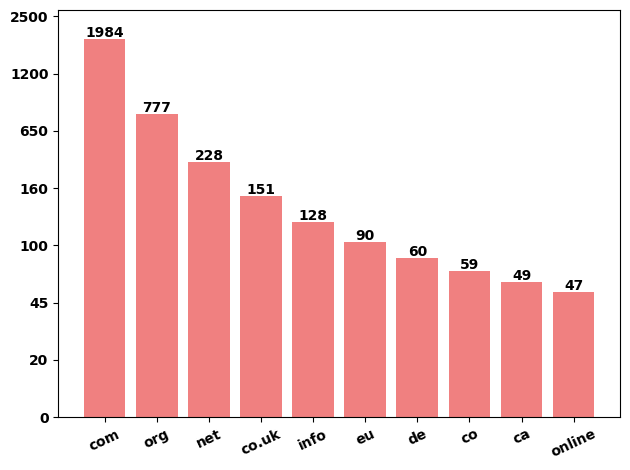

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample imbalanced data
categories = ['com', 'org', 'net', 'co.uk', 'info', 'eu', 'de', 'co', 'ca', 'online']
counts = [1984, 777, 228, 151, 128, 90, 60, 59, 49, 47]  # Example counts, adjust as needed
x_factor = (50,100)
counts_2 = counts[:1]
for i in range(len(counts)-1):
    counts_2.append(counts_2[-1]-(counts_2[-1]*0.01)**2)

# Create a DataFrame from the data
data = {'Category': categories, 'Count': counts_2}
df = pd.DataFrame(data)

# Calculate the scaling factor for the bars
total_count = max(df['Count']+150)
scaling_factor = total_count / df.shape[0]

# Create the bar plot
# plt.figure(figsize = (7,5))
plt.bar(df['Category'],df['Count'],color='lightcoral')

# Scale the height of the bars
plt.ylim(0, total_count)

# Add scaled count labels on top of each bar
for index, row in enumerate(counts_2):
    plt.text(index, row + scaling_factor * 0.05, f"{counts[index]}", color='black', ha="center",weight='bold')

# Show plot
plt.yticks([i*300 for i in range(len(counts)-2)],[str(0),str(20),str(45),str(100),str(160),str(650),str(1200),str(2500)],weight='bold')
plt.xticks(weight='bold',rotation = 25)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

plt.tight_layout()
plt.savefig('top_tld_4.png')
plt.show()